In [130]:
import numpy as np
import pandas as pd
import scipy
import torch


Full Batch Gradient descent

1)

In [131]:
num_samples = 40
np.random.seed(45) 
  
# Generate data
x1 = np.random.uniform(-20, 20, num_samples)
f_x = 100*x1 + 1
eps = np.random.randn(num_samples)
y = f_x + eps
print(x1.shape,y.shape)

(40,) (40,)


In [132]:
theta=torch.randn((2,1),requires_grad=True)#initialization of theta

x=torch.tensor(x1,dtype=torch.float32).view(-1, 1)
x=torch.cat((torch.ones(x.shape[0],1),x), dim=1)
y =torch.tensor(y, dtype=torch.float32).view(-1, 1)

theta_true=np.linalg.inv(x.T@x)@x.T@y

print(f"theta_true:{theta_true}")
theta_hist=[]
loss_hist=[]
learning_rate=0.005
Epoch=0
while(True):
    Epoch+=1
    theta_old=theta.clone()
    theta_hist.append(theta_old.detach().numpy().flatten())
    y_pred=torch.matmul(x,theta)
    loss=torch.mean((y-y_pred)**2)
    loss_hist.append(loss.clone().detach().item())
    loss.backward()
    with torch.no_grad():
        theta-=learning_rate*theta.grad
        theta.grad.zero_()
        if(torch.norm(theta_true.clone().detach()-theta.clone().detach())<0.001):
            break
    print(f"Step {Epoch}, theta:\n", theta)
    if(Epoch>1000):
        break
print(f"Number of Epochs:{Epoch}\n") 

theta_true:tensor([[ 0.9507],
        [99.9841]])
Step 1, theta:
 tensor([[4.4246e-02],
        [1.2634e+02]], requires_grad=True)
Step 2, theta:
 tensor([[ 0.4998],
        [93.0263]], requires_grad=True)
Step 3, theta:
 tensor([[  0.3865],
        [101.8090]], requires_grad=True)
Step 4, theta:
 tensor([[ 0.4230],
        [99.4940]], requires_grad=True)
Step 5, theta:
 tensor([[  0.4200],
        [100.1043]], requires_grad=True)
Step 6, theta:
 tensor([[ 0.4273],
        [99.9435]], requires_grad=True)
Step 7, theta:
 tensor([[ 0.4319],
        [99.9860]], requires_grad=True)
Step 8, theta:
 tensor([[ 0.4371],
        [99.9749]], requires_grad=True)
Step 9, theta:
 tensor([[ 0.4421],
        [99.9779]], requires_grad=True)
Step 10, theta:
 tensor([[ 0.4470],
        [99.9772]], requires_grad=True)
Step 11, theta:
 tensor([[ 0.4520],
        [99.9774]], requires_grad=True)
Step 12, theta:
 tensor([[ 0.4568],
        [99.9774]], requires_grad=True)
Step 13, theta:
 tensor([[ 0.4617],
 

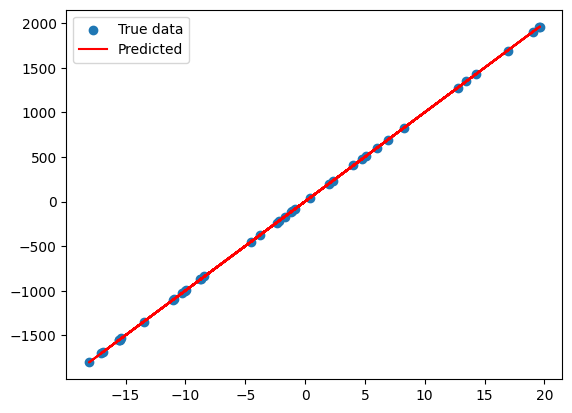

In [133]:
import matplotlib.pyplot as plt

y_pred = x @ theta

plt.scatter(x[:,1].numpy(), y.numpy(), label='True data')  # x[:,1] is original feature
plt.plot(x[:,1].numpy(), y_pred.detach().numpy(), color='red', label='Predicted')
plt.legend()
plt.show()


In [134]:
loss=torch.mean((y-x@theta)**2)
print(f"loss:{loss.item()}")

loss:0.5957571268081665


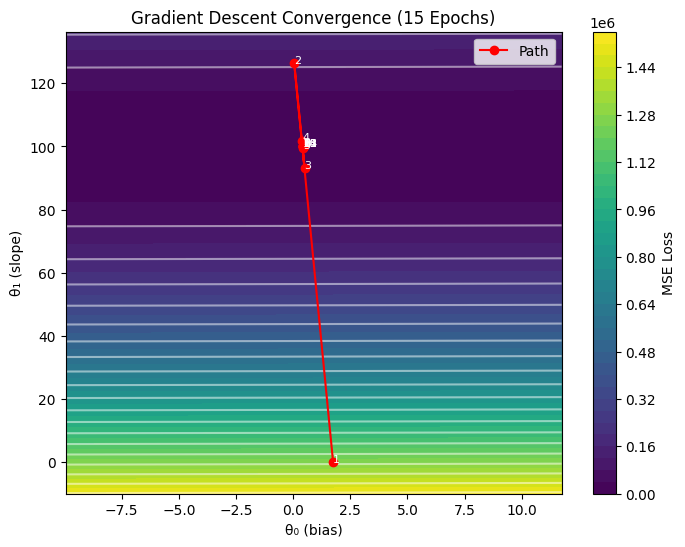

In [135]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def visualize_convergence(x, y, theta_hist, animate=False):
    """
    Visualize gradient descent convergence over the first 15 epochs.

    Parameters:
    - x : numpy array of shape (n_samples, 2)  # with bias column
    - y : numpy array of shape (n_samples, 1)
    - theta_hist : array of parameter vectors (theta_0, theta_1)
    - animate : bool, if True makes an animation, else static plot
    """

    # Take only first 15 steps
    theta_hist = np.array(theta_hist[:15])

    # Create parameter grid
    t0_vals = np.linspace(min(theta_hist[:,0])-10, max(theta_hist[:,0])+10, 200)
    t1_vals = np.linspace(min(theta_hist[:,1])-10, max(theta_hist[:,1])+10, 200)
    T0, T1 = np.meshgrid(t0_vals, t1_vals)

    # Compute loss surface
    Z = np.zeros_like(T0)
    for i in range(T0.shape[0]):
        for j in range(T0.shape[1]):
            th = np.array([T0[i, j], T1[i, j]])
            y_pred = x @ th.reshape(-1, 1)
            Z[i, j] = np.mean((y - y_pred) ** 2)

    if not animate:
        # Static contour plot
        plt.figure(figsize=(8,6))
        plt.contourf(T0, T1, Z, levels=50, cmap="viridis")
        plt.colorbar(label="MSE Loss")
        plt.contour(T0, T1, Z, levels=20, colors="white", alpha=0.5)

        # Plot path
        plt.plot(theta_hist[:,0], theta_hist[:,1], 'ro-', label="Path")
        for i, (t0, t1) in enumerate(theta_hist):
            plt.text(t0, t1, str(i+1), color="white", fontsize=8)

        plt.xlabel("θ₀ (bias)")
        plt.ylabel("θ₁ (slope)")
        plt.title("Gradient Descent Convergence (15 Epochs)")
        plt.legend()
        plt.show()

    else:
        # Animated version
        fig, ax = plt.subplots(figsize=(8,6))
        ax.contourf(T0, T1, Z, levels=50, cmap="viridis")
        ax.contour(T0, T1, Z, levels=20, colors="white", alpha=0.5)
        line, = ax.plot([], [], 'ro-', label="Path")
        ax.set_xlabel("θ₀ (bias)")
        ax.set_ylabel("θ₁ (slope)")
        ax.set_title("Gradient Descent Convergence")
        ax.legend()

        def update(frame):
            line.set_data(theta_hist[:frame+1,0], theta_hist[:frame+1,1])
            return line,

        ani = animation.FuncAnimation(fig, update, frames=len(theta_hist), interval=500, blit=True)
        plt.close(fig) 
        return ani

visualize_convergence(x.numpy(), y.numpy(), theta_hist, animate=False)  # static

ani = visualize_convergence(x.numpy(), y.numpy(), theta_hist, animate=True)  # animated
ani.save("gd_convergence_1.gif", writer="pillow")  # save GIF



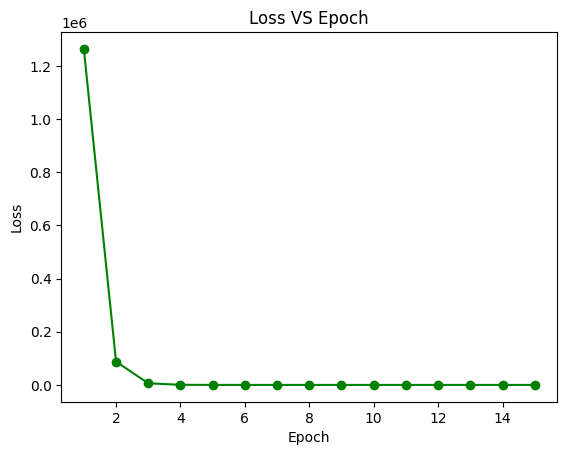

In [136]:
Epoch_hist=np.array([i for i in range(1,16)])
plt.plot(Epoch_hist,loss_hist[0:15],color='g',marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss VS Epoch")
plt.show()

2)

In [137]:
np.random.seed(45)
num_samples = 40
    
# Generate data
x1 = np.random.uniform(-1, 1, num_samples)
f_x = 3*x1 + 4
eps = np.random.randn(num_samples)
y = f_x + eps

In [138]:
theta=torch.randn((2,1),requires_grad=True)#initialize theta

x=torch.tensor(x1,dtype=torch.float32).view(-1, 1)
x=torch.cat((torch.ones(x.shape[0],1),x), dim=1)
y =torch.tensor(y, dtype=torch.float32).view(-1, 1)

theta_true=np.linalg.inv(x.T@x)@x.T@y

print(f"theta_true:{theta_true}")
theta_hist=[]
loss_hist=[]
learning_rate=0.005
Epoch=0
while(True):
    Epoch+=1
    theta_old=theta.clone()
    theta_hist.append(theta_old.detach().numpy().flatten())
    y_pred=torch.matmul(x,theta)
    loss=torch.mean((y-y_pred)**2)
    loss_hist.append(loss.clone().detach().item())
    loss.backward()
    with torch.no_grad():
        theta-=learning_rate*theta.grad
        theta.grad.zero_()
        if(torch.norm(theta_true.clone().detach()-theta.clone().detach())<0.001):
            break
    print(f"Step {Epoch}, theta:\n", theta)
    if(Epoch>1000):
        break
print(f"Number of Epochs:{Epoch}\n") 

theta_true:tensor([[3.9507],
        [2.6825]])
Step 1, theta:
 tensor([[ 1.2672],
        [-0.1552]], requires_grad=True)
Step 2, theta:
 tensor([[ 1.2916],
        [-0.1485]], requires_grad=True)
Step 3, theta:
 tensor([[ 1.3158],
        [-0.1418]], requires_grad=True)
Step 4, theta:
 tensor([[ 1.3398],
        [-0.1351]], requires_grad=True)
Step 5, theta:
 tensor([[ 1.3635],
        [-0.1284]], requires_grad=True)
Step 6, theta:
 tensor([[ 1.3870],
        [-0.1217]], requires_grad=True)
Step 7, theta:
 tensor([[ 1.4102],
        [-0.1150]], requires_grad=True)
Step 8, theta:
 tensor([[ 1.4333],
        [-0.1084]], requires_grad=True)
Step 9, theta:
 tensor([[ 1.4561],
        [-0.1017]], requires_grad=True)
Step 10, theta:
 tensor([[ 1.4787],
        [-0.0950]], requires_grad=True)
Step 11, theta:
 tensor([[ 1.5010],
        [-0.0883]], requires_grad=True)
Step 12, theta:
 tensor([[ 1.5232],
        [-0.0816]], requires_grad=True)
Step 13, theta:
 tensor([[ 1.5451],
        [-0.0

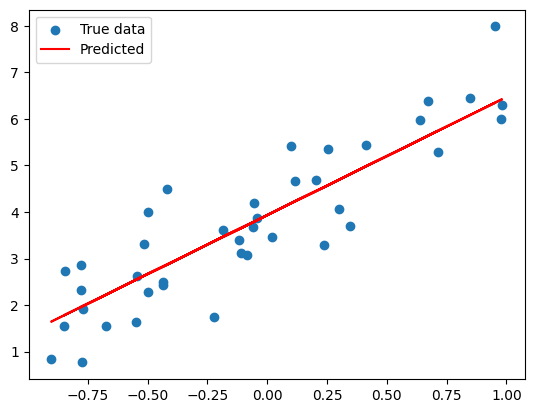

In [139]:
import matplotlib.pyplot as plt

y_pred = x @ theta

plt.scatter(x[:,1].numpy(), y.numpy(), label='True data')  # x[:,1] is original feature
plt.plot(x[:,1].numpy(), y_pred.detach().numpy(), color='red', label='Predicted')
plt.legend()
plt.show()

In [140]:
loss=torch.mean((y-x@theta)**2)
print(f"loss:{loss.item()}")

loss:0.6023855805397034


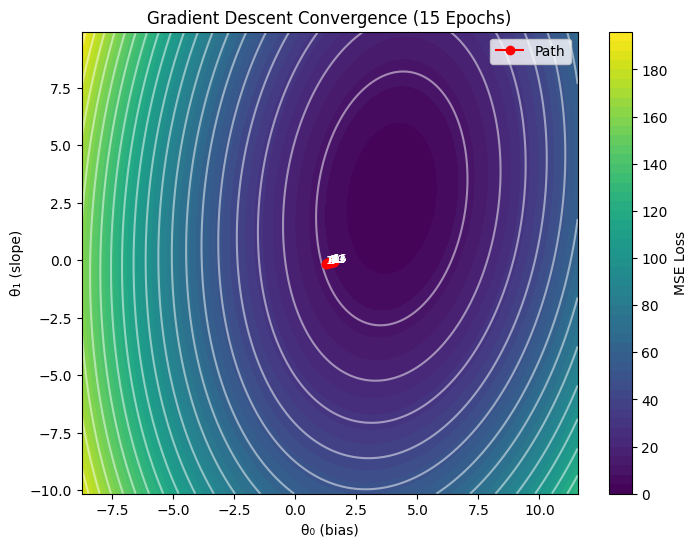

In [141]:
visualize_convergence(x.numpy(), y.numpy(), theta_hist, animate=False)  # static
ani = visualize_convergence(x.numpy(), y.numpy(), theta_hist, animate=True)  # animated
ani.save("gd_convergence_2.gif", writer="pillow")  # save GIF


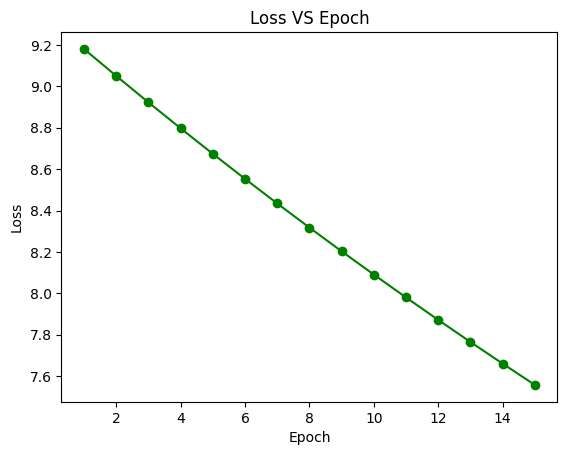

In [142]:
Epoch_hist=np.array([i for i in range(1,16)])
plt.plot(Epoch_hist,loss_hist[0:15],color='g',marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss VS Epoch")
plt.show()

Socastic gradient Descent

1)

In [143]:
num_samples = 40
np.random.seed(45) 
    
# Generate data
x1 = np.random.uniform(-20, 20, num_samples)
f_x = 100*x1 + 1
eps = np.random.randn(num_samples)
y = f_x + eps
print(x1.shape,y.shape)

(40,) (40,)


In [144]:

theta=torch.randn((2,1),requires_grad=True)#initialize
y=torch.tensor(y,dtype=torch.float32).view(-1,1)
x=torch.tensor(x1,dtype=torch.float32).view(-1,1)
x_=torch.cat((torch.ones(x.shape[0],1),x), dim=1)
print("size:",y.shape,x.shape)
theta_true=np.linalg.inv(x_.T@x_)@x_.T@y

print(f"theta_true:{theta_true}")

Epoch=0
theta_hist=[]
loss_hist=[]
learning_rate=0.005
while(True):
    Epoch+=1
    theta_old=theta.clone()
    theta_hist.append(theta_old.detach().numpy().flatten())
    #indices for shuffuling
    indices = torch.randperm(x.shape[0])

    for i in indices:
        y_pred=theta[0]+theta[1]*(x[i])
        loss=(y[i]-y_pred)**2
        loss_hist.append(loss.clone().detach().item())
        loss.backward()
        with torch.no_grad():
            theta-=learning_rate*theta.grad
            theta.grad.zero_()
    if(torch.norm(theta_true.clone().detach()-theta.clone().detach())<0.001):
            break
    if(Epoch>1000):
        break
    print(f"Epoch{Epoch}, theta:\n",theta)
print("Final Epoch:", Epoch)
print("Final theta:", theta.detach())
        

size: torch.Size([40, 1]) torch.Size([40, 1])
theta_true:tensor([[ 0.9507],
        [99.9841]])
Epoch1, theta:
 tensor([[-42.3327],
        [138.6045]], requires_grad=True)
Epoch2, theta:
 tensor([[-31.1775],
        [124.5733]], requires_grad=True)
Epoch3, theta:
 tensor([[-15.2863],
        [100.3721]], requires_grad=True)
Epoch4, theta:
 tensor([[-13.3115],
        [ 95.0024]], requires_grad=True)
Epoch5, theta:
 tensor([[-5.4732],
        [97.6659]], requires_grad=True)
Epoch6, theta:
 tensor([[ -3.6395],
        [100.1039]], requires_grad=True)
Epoch7, theta:
 tensor([[ -1.4386],
        [100.2716]], requires_grad=True)
Epoch8, theta:
 tensor([[ -0.2065],
        [101.0305]], requires_grad=True)
Epoch9, theta:
 tensor([[ 1.2299],
        [99.4166]], requires_grad=True)
Epoch10, theta:
 tensor([[  1.0573],
        [100.0732]], requires_grad=True)
Epoch11, theta:
 tensor([[ 0.7339],
        [99.7636]], requires_grad=True)
Epoch12, theta:
 tensor([[  0.6536],
        [100.0123]], req

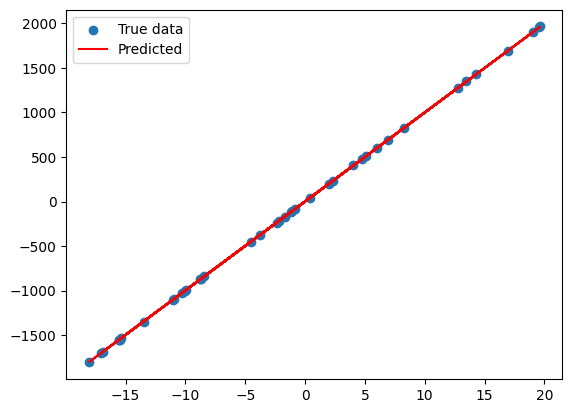

In [145]:
import matplotlib.pyplot as plt

y_pred = theta[0]+x*theta[1]

plt.scatter(x.numpy(), y.numpy(), label='True data') 
plt.plot(x.numpy(), y_pred.detach().numpy(), color='red', label='Predicted')
plt.legend()
plt.show()

In [146]:
loss=torch.mean((y-theta[0]-x*theta[1])**2)
print(f"loss:{loss.item()}")

loss:8.57655143737793


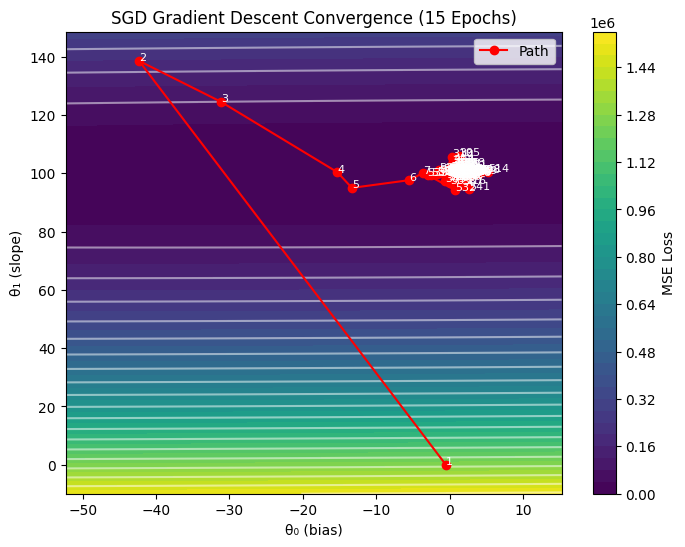

In [147]:
def visualize_convergence_sgd_1d(x, y, theta_hist, animate=False):
    theta_hist = np.array(theta_hist[:15 * len(x)])  # first 15 epochs

    # Flatten x to 1D
    x = x.flatten()
    y = y.flatten()

    # Grid for contour
    t0_vals = np.linspace(np.min(theta_hist[:,0])-10, np.max(theta_hist[:,0])+10, 200)
    t1_vals = np.linspace(np.min(theta_hist[:,1])-10, np.max(theta_hist[:,1])+10, 200)
    T0, T1 = np.meshgrid(t0_vals, t1_vals)

    Z = np.zeros_like(T0)
    for i in range(T0.shape[0]):
        for j in range(T0.shape[1]):
            th = np.array([T0[i,j], T1[i,j]])
            y_pred = th[0] + th[1] * x
            Z[i,j] = np.mean((y - y_pred)**2)

    if not animate:
        plt.figure(figsize=(8,6))
        plt.contourf(T0, T1, Z, levels=50, cmap="viridis")
        plt.colorbar(label="MSE Loss")
        plt.contour(T0, T1, Z, levels=20, colors="white", alpha=0.5)

        plt.plot(theta_hist[:,0], theta_hist[:,1], 'ro-', label="Path")
        for k, (t0, t1) in enumerate(theta_hist):
            plt.text(t0, t1, str(k+1), color="white", fontsize=8)

        plt.xlabel("θ₀ (bias)")
        plt.ylabel("θ₁ (slope)")
        plt.title("SGD Gradient Descent Convergence (15 Epochs)")
        plt.legend()
        plt.show()

    else:
        fig, ax = plt.subplots(figsize=(8,6))
        ax.contourf(T0, T1, Z, levels=50, cmap="viridis")
        ax.contour(T0, T1, Z, levels=20, colors="white", alpha=0.5)
        line, = ax.plot([], [], 'ro-', label="Path")
        ax.set_xlabel("θ₀ (bias)")
        ax.set_ylabel("θ₁ (slope)")
        ax.set_title("SGD Gradient Descent Convergence")
        ax.legend()

        def update(frame):
            line.set_data(theta_hist[:frame+1,0], theta_hist[:frame+1,1])
            return line,

        ani = animation.FuncAnimation(fig, update, frames=len(theta_hist), interval=200, blit=True)
        plt.close(fig) 
        return ani
visualize_convergence_sgd_1d(x.numpy(), y.numpy(), theta_hist, animate=False)  # static
ani = visualize_convergence_sgd_1d(x.numpy(), y.numpy(), theta_hist, animate=True)  # animated
ani.save("gd_convergence_3.gif", writer="pillow")  # save GIF



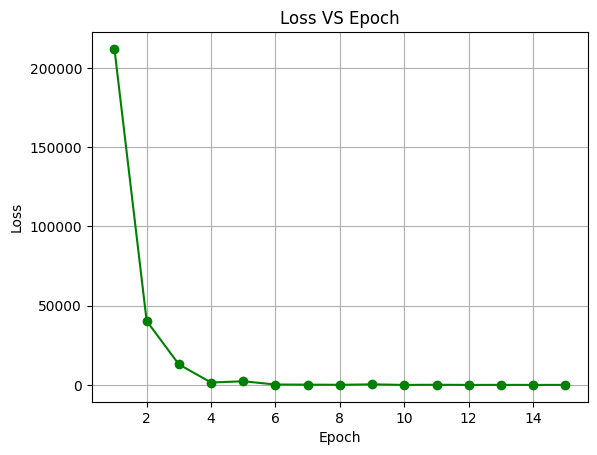

In [148]:
# Convert loss_hist to numpy
loss_hist = np.array(loss_hist)[:600]

# Number of samples per epoch
n_samples = 40

# Average loss per epoch
loss_per_epoch = [np.mean(loss_hist[i*n_samples:(i+1)*n_samples]) for i in range(int(len(loss_hist)/n_samples))]

# Epoch numbers
Epoch_hist = np.arange(1, len(loss_per_epoch)+1)

# Plot
plt.plot(Epoch_hist, loss_per_epoch, color='g', marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss VS Epoch")
plt.grid(True)
plt.show()


In [149]:
np.random.seed(45)
num_samples = 40
    
# Generate data
x1 = np.random.uniform(-1, 1, num_samples)
f_x = 3*x1 + 4
eps = np.random.randn(num_samples)
y = f_x + eps

In [150]:

theta=torch.randn((2,1),requires_grad=True)#initialize
y=torch.tensor(y,dtype=torch.float32).view(-1,1)
x=torch.tensor(x1,dtype=torch.float32).view(-1,1)
x_=torch.cat((torch.ones(x.shape[0],1),x), dim=1)
print("size:",y.shape,x.shape)
theta_true=np.linalg.inv(x_.T@x_)@x_.T@y

print(f"theta_true:{theta_true}")

Epoch=0
theta_hist=[]
loss_hist=[]
learning_rate=0.005
while(True):
    Epoch+=1
    theta_old=theta.clone()
    theta_hist.append(theta_old.detach().numpy().flatten())
    #indices for shuffuling
    indices = torch.randperm(x.shape[0])

    for i in indices:
        y_pred=theta[0]+theta[1]*(x[i])
        loss=(y[i]-y_pred)**2
        loss_hist.append(loss.clone().detach().item())
        loss.backward()
        with torch.no_grad():
            theta-=learning_rate*theta.grad
            theta.grad.zero_()
    if(torch.norm(theta_true.clone().detach()-theta.clone().detach())<0.001):
            break
    if(Epoch>1000):
        break
    print(f"Epoch{Epoch}, theta:\n",theta)
print("Final Epoch:", Epoch)
print("Final theta:", theta.detach())

size: torch.Size([40, 1]) torch.Size([40, 1])
theta_true:tensor([[3.9507],
        [2.6825]])
Epoch1, theta:
 tensor([[0.6846],
        [0.6613]], requires_grad=True)
Epoch2, theta:
 tensor([[1.7079],
        [0.8251]], requires_grad=True)
Epoch3, theta:
 tensor([[2.4036],
        [0.9838]], requires_grad=True)
Epoch4, theta:
 tensor([[2.8770],
        [1.1423]], requires_grad=True)
Epoch5, theta:
 tensor([[3.1897],
        [1.3000]], requires_grad=True)
Epoch6, theta:
 tensor([[3.4080],
        [1.4453]], requires_grad=True)
Epoch7, theta:
 tensor([[3.5514],
        [1.5788]], requires_grad=True)
Epoch8, theta:
 tensor([[3.6516],
        [1.7019]], requires_grad=True)
Epoch9, theta:
 tensor([[3.7177],
        [1.8124]], requires_grad=True)
Epoch10, theta:
 tensor([[3.7682],
        [1.9083]], requires_grad=True)
Epoch11, theta:
 tensor([[3.8159],
        [1.9931]], requires_grad=True)
Epoch12, theta:
 tensor([[3.8449],
        [2.0707]], requires_grad=True)
Epoch13, theta:
 tensor([[3

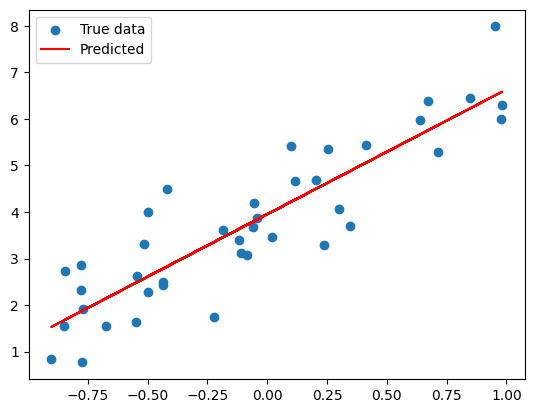

In [151]:
import matplotlib.pyplot as plt

y_pred = theta[0]+x*theta[1]

plt.scatter(x.numpy(), y.numpy(), label='True data') 
plt.plot(x.numpy(), y_pred.detach().numpy(), color='red', label='Predicted')
plt.legend()
plt.show()

In [152]:
loss=torch.mean((y-theta[0]-x*theta[1])**2)
print(f"loss:{loss.item()}")

loss:0.5957541465759277


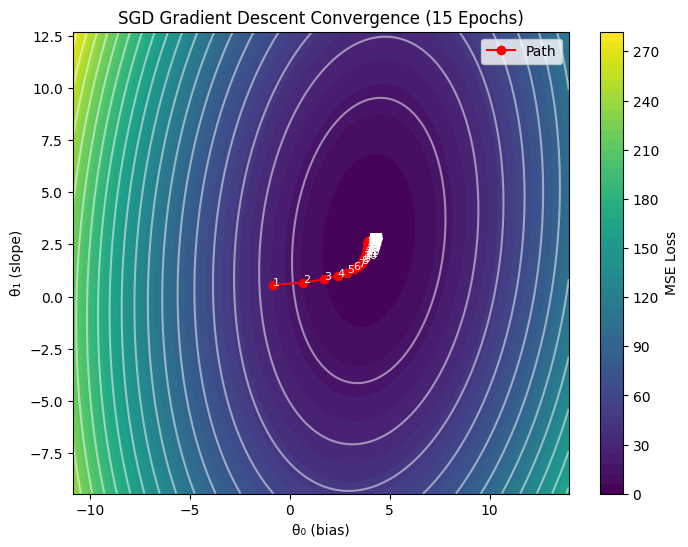

In [153]:
visualize_convergence_sgd_1d(x.numpy(), y.numpy(), theta_hist, animate=False)  #static
ani = visualize_convergence_sgd_1d(x.numpy(), y.numpy(), theta_hist, animate=True)  # animated
ani.save("gd_convergence_4.gif", writer="pillow")  # save GIF



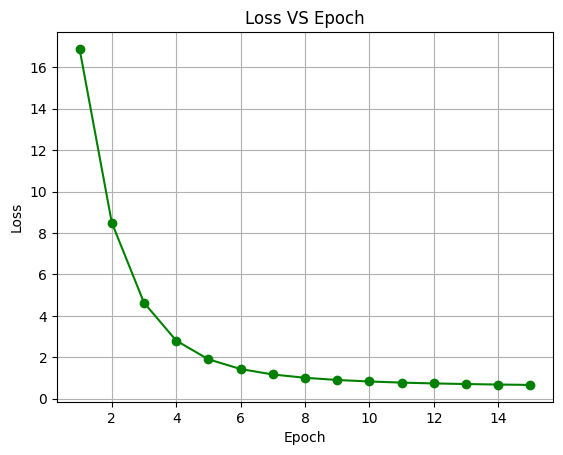

In [154]:
# Convert loss_hist to numpy
loss_hist = np.array(loss_hist)[:600]

# Number of samples per epoch
n_samples = 40

# Average loss per epoch
loss_per_epoch = [np.mean(loss_hist[i*n_samples:(i+1)*n_samples]) for i in range(int(len(loss_hist)/n_samples))]

# Epoch numbers
Epoch_hist = np.arange(1, len(loss_per_epoch)+1)

# Plot
plt.plot(Epoch_hist, loss_per_epoch, color='g', marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss VS Epoch")
plt.grid(True)
plt.show()
